<a href="https://colab.research.google.com/github/semishen/DL-CVMarathon/blob/master/Day003_color_spave_op_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 以彩色圖片的方式載入
img = cv2.imread('lena.png', cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

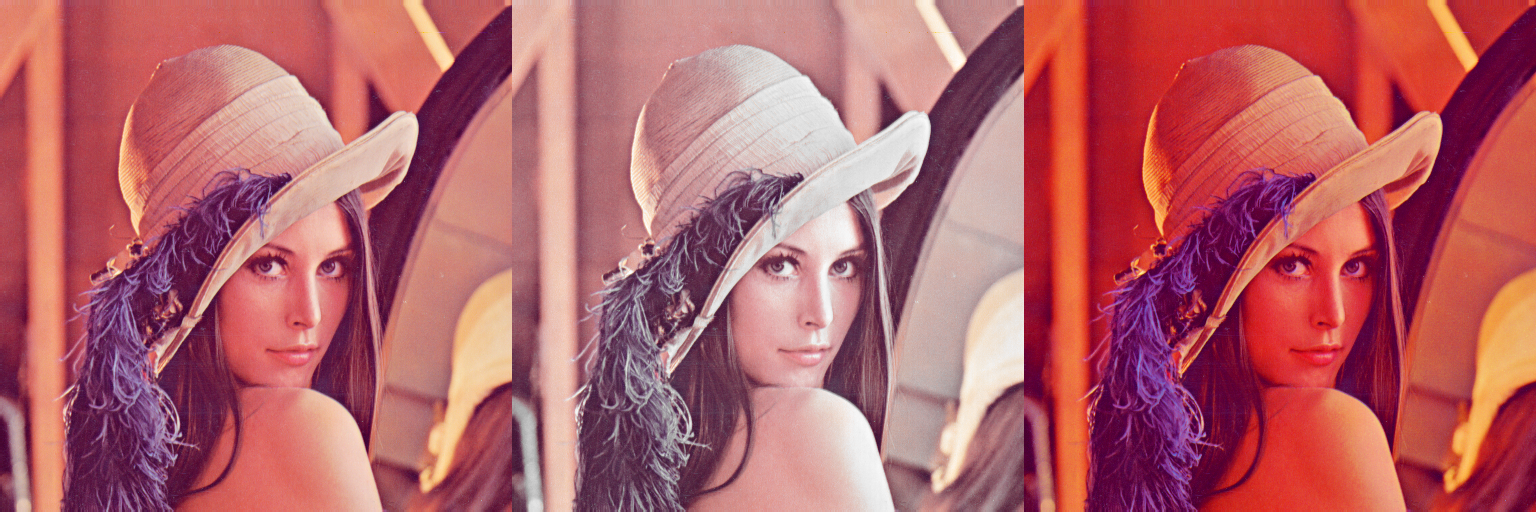

In [48]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.25

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')

channel_s = img_hsv_down[:,:,1] # get saturation
channel_s = (channel_s/255.0) - change_percentage
channel_s[channel_s < 0] = 0 # clip value
channel_s = channel_s*255.0 # back to 255
img_hsv_down[:,:,1] = channel_s # pull back
img_hsv_down = img_hsv_down.astype('uint8') #back to uint8

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')

channel_s = img_hsv_up[:,:,1] # get saturation
channel_s = (channel_s/255.0) + change_percentage
channel_s[channel_s > 1] = 1 # clip value
channel_s = channel_s*255.0 # back to 255
img_hsv_up[:,:,1] = channel_s # pull back
img_hsv_up = img_hsv_up.astype('uint8') #back to uint8

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)


# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
cv2_imshow(img_hsv_change)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

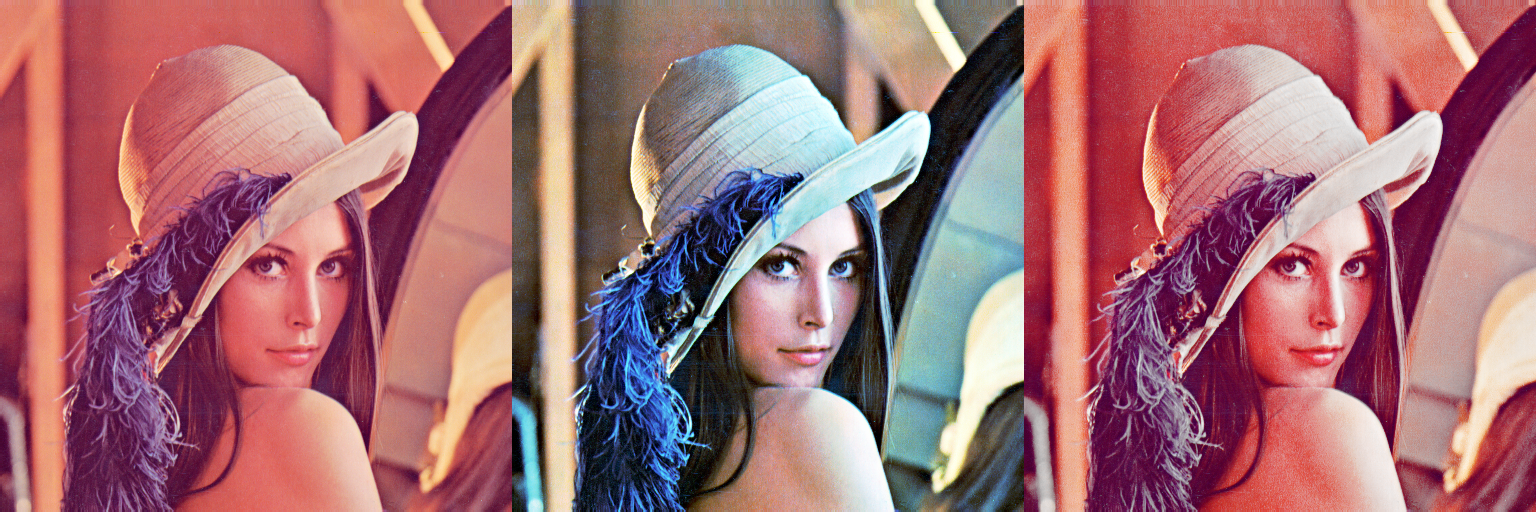

In [40]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = np.copy(img)
equalHist_by_channel[...,0] = cv2.equalizeHist(equalHist_by_channel[...,0]) # b_channel
equalHist_by_channel[...,1] = cv2.equalizeHist(equalHist_by_channel[...,1]) # g_channel
equalHist_by_channel[...,2] = cv2.equalizeHist(equalHist_by_channel[...,2]) # r_channel

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = equalHist_by_channel

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# equalizeHist Saturation
s_channel = img_hsv_equal[...,1] # get Saturation
s_channel = cv2.equalizeHist(s_channel) # equalizeHist
img_hsv_equal[...,1] = s_channel # pull back
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2BGR) # back2BGR

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
cv2_imshow(img_bgr_equalHist)

## 調整對比 / 明亮

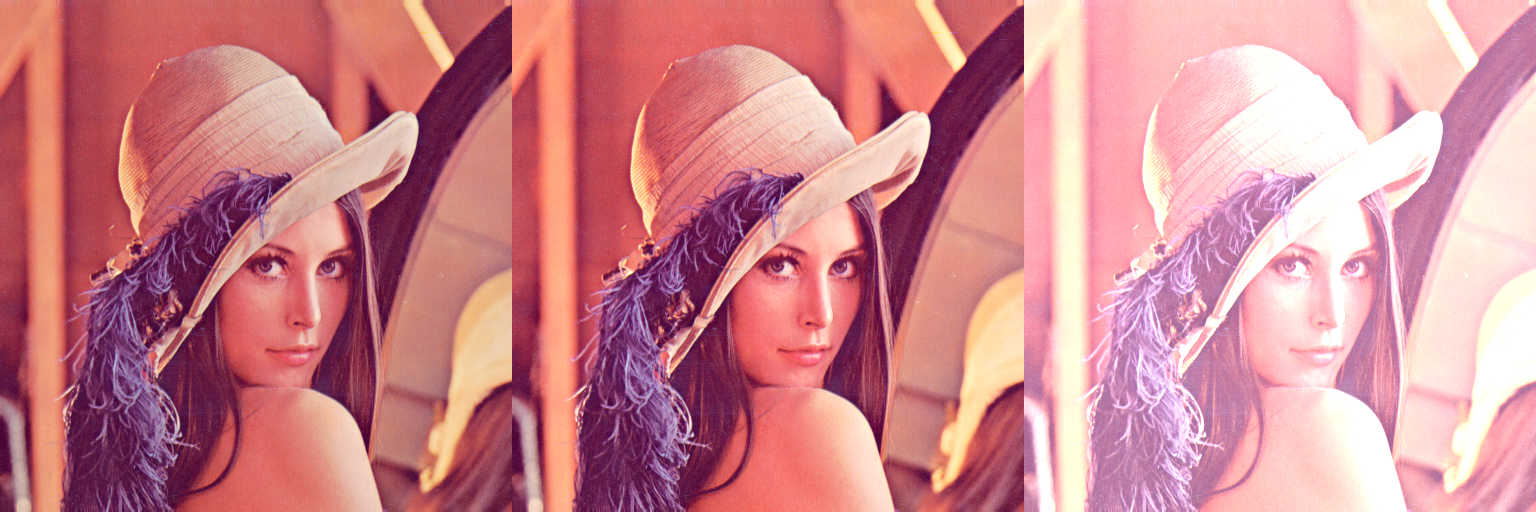

In [44]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha = 1.1)
add_lighness = cv2.convertScaleAbs(img, beta = 100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
cv2_imshow(img_contrast_light)